In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
X = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])
X[:,0],X[:,1]

(array([1. , 1.5, 5. , 8. , 1. , 9. ]),
 array([ 2. ,  1.8,  8. ,  8. ,  0.6, 11. ]))

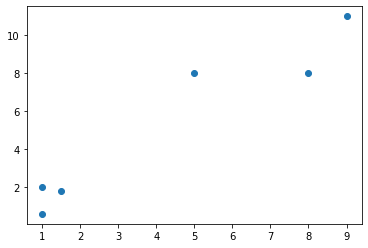

In [25]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [26]:
from sklearn.cluster import KMeans

In [16]:
k_means = KMeans(n_clusters = 3)

In [17]:
k_means.fit(X)

KMeans(n_clusters=3)

In [18]:
k_means.labels_

array([0, 0, 2, 2, 0, 1], dtype=int32)

In [19]:
k_means.cluster_centers_

array([[ 1.16666667,  1.46666667],
       [ 9.        , 11.        ],
       [ 6.5       ,  8.        ]])

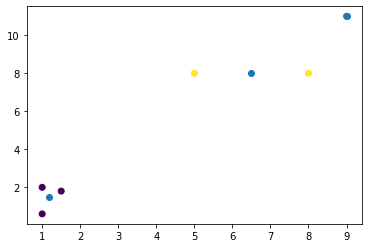

In [20]:
plt.scatter(X[:,0],X[:,1],c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1])
plt.show()

In [63]:
class K_Means:
    def __init__(self, k = 2, max_iter = 100):
        print("constructor")
        self.k = k
        self.max_iter = max_iter
        
    def fit(self,data):
        self.means = []
        # randomly initialize the means
        for i in range(self.k):
            self.means.append(data[i])
        for i in range(self.max_iter):
            # assign the data points to the cluster that they belong to
            # create emtpy clusters
            clusters = []
            for j in range(self.k):
                clusters.append([])
            for point in data:
                # find distance to all the mean values
                distances = [((point-m)**2).sum() for m in self.means]
                # find the min distance
                minDistance = min(distances)
                # find the mean for which we got the minimum distances
                l = distances.index(minDistance)
                # add this point to cluster 1
                clusters[l].append(point)
            # calculate the new mean values
            change = False
            for j in range(self.k):
                new_mean = np.average(clusters[j],axis=0)
                if not np.array_equal(self.means[j],new_mean):
                    change = True
                self.means[j] = new_mean
            if not change:
                break
            
    def predict(self,test_data):
        predictions = []
        for point in test_data:
            # find distance to all the mean values
            distances = [((point-m)**2).sum() for m in self.means]
            # find the min distance
            minDistance = min(distances)
            # find the mean for which we got the minimum distances
            l = distances.index(minDistance)
            # add this point to cluster 1
            predictions.append(l)
        return predictions

In [36]:
def fit(data,k=2,max_iter=100):
    means = []
    # randomly initialize the means
    for i in range(k):
        means.append(data[i])
    for i in range(max_iter):
        # assign the data points to the cluster that they belong to
        # create emtpy clusters
        clusters = []
        for j in range(k):
            clusters.append([])
        for point in data:
            # find distance to all the mean values
            distances = [((point-m)**2).sum() for m in means]
            # find the min distance
            minDistance = min(distances)
            # find the mean for which we got the minimum distances
            l = distances.index(minDistance)
            # add this point to cluster 1
            clusters[l].append(point)
        # calculate the new mean values
        change = False
        for j in range(k):
            new_mean = np.average(clusters[j],axis=0)
            if not np.array_equal(means[j],new_mean):
                change = True
            means[j] = new_mean
        if not change:
            break
        return means

In [40]:
def predict(test_data,means):
    predictions = []
    for point in test_data:
        # find distance to all the mean values
        distances = [((point-m)**2).sum() for m in means]
        # find the min distance
        minDistance = min(distances)
        # find the mean for which we got the minimum distances
        l = distances.index(minDistance)
        # add this point to cluster 1
        predictions.append(l)
    return predictions

In [41]:
means = fit(X)

In [42]:
predict(X,means)

[0, 0, 1, 1, 0, 1]

In [64]:
kmeans = K_Means(k=2,max_iter=100)

constructor


In [65]:
kmeans.fit(X)

In [66]:
kmeans.predict(X)

[0, 0, 1, 1, 0, 1]